In [7]:
import numpy as np
import matplotlib.pyplot as plt

w_step = -0.2
w_kill_prey = 1
w_kill_enemy = 3
w_kill_bonus = 1.5

In [3]:
def paint_map(preys_mask, enemies_mask, bonuses_mask, distances):
    image = np.empty((*preys_mask.shape, 3), dtype=int)
    image.fill(255)
    image[preys_mask == 1] = 0, 255, 0
    image[enemies_mask == 1] = 255, 0, 0
    image[bonuses_mask == 1] = 255, 255, 0
    image[3, 3] = 0, 0, 255

    fig, ax = plt.subplots()
    im = ax.imshow(image)
    im.set_extent((0, distances.shape[1], distances.shape[0], 0))

    for i in range(distances.shape[0]):
        for j in range(distances.shape[1]):
            ax.text(j+0.5, i+0.5, str(distances[i, j]), ha='center', va='center', fontsize=10)

    plt.axis("off")
    plt.show()

shape = (7, 7)

stones_mask = np.zeros(shape, dtype=np.float32)

preys_mask = np.zeros(shape, dtype=np.float32)
preys_mask[1, 0] = 1
preys_mask[2, 0] = 1
preys_mask[3, 0] = 1
preys_mask[3, 5] = 1

teammates_mask = np.zeros(shape, dtype=np.float32)

enemies_mask = np.zeros(shape, dtype=np.float32)
enemies_mask[6, 6] = 1

bonuses_mask = np.zeros(shape, dtype=np.float32)
bonuses_mask[0, 6] = 1

# distances = np.round(np.random.rand(*shape), 2)
# distances = np.round(get_distance_mask(stones_mask), 2)

processed_state_i = np.stack([stones_mask, preys_mask, teammates_mask, enemies_mask, bonuses_mask])

# paint_map(preys_mask, enemies_mask, bonuses_mask, np.round(np.array(distances), 2))

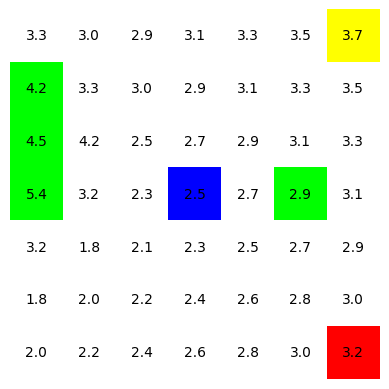

In [66]:
graph = __create_graph(stones_mask)
distances = BellamanFord_modified(
    graph,
    shape=(7, 7),
    source=(3, 3),
    dummy_step_weight=-0.2,
    n_steps=20
)
paint_map(preys_mask, enemies_mask, bonuses_mask, np.round(np.array(distances), 2))